In [1]:
from utils import *
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from joblib import Parallel, delayed

In [2]:
transform_name = 'WhiteNoise'
xscale = 'log'

In [3]:
df = load_robustnes(transform_name)
print(len(df.dataset.unique()))
df

Loaded 23902 files
128


dataset      method           transform  seed  \
0                            Ham  hivecotev2  WhiteNoise;10000.0     0   
0                     TwoLeadECG    baseline   WhiteNoise;1000.0     0   
0                            UMD    tsforest   WhiteNoise;0.0001     0   
0                          FordB  hivecotev2     WhiteNoise;0.02     0   
0                     ScreenType      weasel     WhiteNoise;0.05     0   
..                           ...         ...                 ...   ...   
0                        Symbols        eknn    WhiteNoise;0.002     0   
0   DistalPhalanxOutlineAgeGroup         cnn   WhiteNoise;0.0001     0   
0                   CinCECGTorso  hivecotev2    WhiteNoise;0.002     0   
0                          Fungi       drcif     WhiteNoise;0.01     0   
0                       OliveOil      weasel      WhiteNoise;0.2     0   

    accuracy                                               pred  \
0   0.485714  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
0   0.499561                                  [1 1 1 ... 1 1 1]   
0   0.868056  [1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 3 3...   
0   0.814815  [ 1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 ...   
0   0.346667  [2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...   
..       ...                                                ...   
0   0.899497  [6 6 3 5 3 6 5 3 6 5 1 3 2 3 2 4 3 4 2 1 1 6 1...   
0   0.733813  [2 2 2 2 3 2 1 2 1 1 1 2 1 1 2 2 2 2 1 2 2 1 2...   
0   0.992754                                  [3 2 4 ... 1 4 4]   
0   0.967742  [ 1  1  1  1  1  1  1  2  2  2  2  2  2  2  2 ...   
0   0.133333  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3...   

                                                 true       level  \
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...  10000.0000   
0                                   [2 2 1 ... 1 2 2]   1000.0000   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...      0.0001   
0   [ 1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1 ...      0.0200   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...      0.0500   
..                                                ...         ...   
0   [6 6 3 5 3 6 5 3 6 5 1 3 2 3 2 4 3 4 2 1 1 6 2...      0.0020   
0   [2 3 3 2 3 3 1 3 1 1 1 2 1 1 2 3 2 2 2 2 2 2 3...      0.0001   
0                                   [3 2 4 ... 1 4 4]      0.0020   
0   [ 1  1  1  1  1  1  1  2  2  2  2  2  2  2  2 ...      0.0100   
0   [1 1 1 1 1 2 2 2 2 2 2 2 2 2 3 3 3 3 4 4 4 4 4...      0.2000   

        transform_type  
0   WhiteNoise;10000.0  
0    WhiteNoise;1000.0  
0    WhiteNoise;0.0001  
0      WhiteNoise;0.02  
0      WhiteNoise;0.05  
..                 ...  
0     WhiteNoise;0.002  
0    WhiteNoise;0.0001  
0     WhiteNoise;0.002  
0      WhiteNoise;0.01  
0       WhiteNoise;0.2  

[23901 rows x 9 columns]

In [4]:
df = filter_out_incomplete_datasets(df)

['hivecotev2' 'baseline' 'tsforest' 'weasel' 'catch22' 'tsfresh' 'drcif'
 'inception' 'rocket' 'cnn' 'eknn']
['WhiteNoise;10000.0' 'WhiteNoise;1000.0' 'WhiteNoise;0.0001'
 'WhiteNoise;0.02' 'WhiteNoise;0.05' 'WhiteNoise;0.002' 'WhiteNoise;0.2'
 'WhiteNoise;0.1' 'WhiteNoise;0' 'WhiteNoise;10.0' 'WhiteNoise;100.0'
 'WhiteNoise;1.0' 'WhiteNoise;0.01' 'WhiteNoise;0.00001' 'WhiteNoise;0.5'
 'WhiteNoise;0.001' 'WhiteNoise;0.005']
187
not complete datasets: {'Fungi', 'Rock', 'OliveOil'}


In [5]:
df.dataset.unique()

array(['Ham', 'TwoLeadECG', 'UMD', 'FordB', 'ScreenType', 'TwoPatterns',
       'UWaveGestureLibraryZ', 'PhalangesOutlinesCorrect',
       'MiddlePhalanxOutlineAgeGroup', 'FordA', 'Adiac', 'MoteStrain',
       'SonyAIBORobotSurface2', 'Lightning2', 'Wine', 'ACSF1',
       'PigArtPressure', 'BeetleFly', 'Meat', 'ECG5000',
       'PickupGestureWiimoteZ', 'GesturePebbleZ2',
       'SmallKitchenAppliances', 'UWaveGestureLibraryAll', 'PigCVP',
       'CricketZ', 'SwedishLeaf', 'GunPointAgeSpan', 'AllGestureWiimoteX',
       'Crop', 'CBF', 'Mallat', 'CricketX', 'DodgerLoopDay', 'Trace',
       'ToeSegmentation2', 'ArrowHead', 'MedicalImages',
       'GesturePebbleZ1', 'EthanolLevel', 'FaceFour',
       'ProximalPhalanxOutlineCorrect', 'InsectEPGRegularTrain',
       'SemgHandGenderCh2', 'FreezerSmallTrain',
       'GunPointMaleVersusFemale', 'EOGHorizontalSignal',
       'NonInvasiveFetalECGThorax1', 'Strawberry', 'Chinatown', 'BME',
       'Lightning7', 'LargeKitchenAppliances', 'GunPointOl

In [6]:
selected_datasets = ['TwoLeadECG', 'Fish', 'GunPointMaleVersusFemale', 'FreezerRegularTrain']
df_subdata = df#.query('dataset in @selected_datasets')

catch22 2125
cnn 2125
drcif 2125
eknn 2125
hivecotev2 2125
inception 2125
rocket 2125
tsforest 2125
tsfresh 2125
weasel 2125


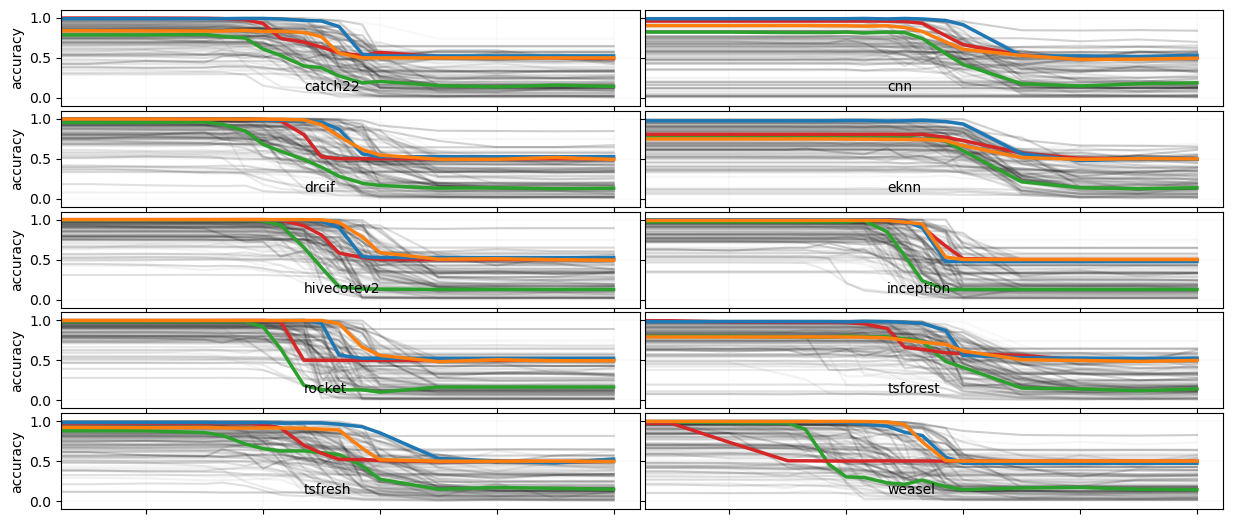

In [14]:
fig, axes = plt.subplots(6, 2, figsize=(12, 6), sharex=True, sharey=True)
from collections import defaultdict
# Flatten the axes array for easy indexing
axes = axes.flatten()

plt.subplots_adjust(wspace=0.00, hspace=0.00)

methods = sorted(df.query("method != 'baseline'")['method'].unique())
# Loop through the methods
for i, method in enumerate(methods):
    sub_df = df_subdata.query(f'method=="{method}"').sort_values('dataset')
    print(method, len(sub_df))
    if len(sub_df)>0:

        years = sorted(df["dataset"].unique())
        greys = iter(sns.color_palette("Greys", len(years)))
        #palette = {year: 'orange' if year in selected_datasets else next(greys) for year in years}
        #palette = {year: 'orange' if year in selected_datasets else 'grey' for year in years}

        #palette = defaultdict(lambda: 'grey')
        #palette.update((year, 'orange') for year in selected_datasets)

        palette = {year: next(greys) for year in years}
        palette[selected_datasets[0]] = 'tab:orange'
        palette[selected_datasets[1]] = 'tab:green'
        palette[selected_datasets[2]] = 'tab:blue'
        palette[selected_datasets[3]] = 'tab:red'
        
        sns.lineplot(
            data=sub_df.query('dataset not in @selected_datasets'),
            x='level', y='accuracy', hue='dataset',
            ax=axes[i], errorbar=None, palette=palette, alpha=0.2
        )

        sns.lineplot(
            data=sub_df.query('dataset in @selected_datasets'),
            x='level', y='accuracy', hue='dataset',
            ax=axes[i], errorbar=None, palette=palette, linewidth=2.5
        )
        
        axes[i].set_xscale(xscale)
        axes[i].get_legend().remove()
        axes[i].set_ylim(-0.1, 1.1)
        axes[i].grid(True, which="both", linestyle="--", linewidth=0.1)
        #axes[i].text(0.95, 0.95, method, ha='right', va='top')
        axes[i].text(0.05, 0.05, method, ha='left', va='bottom')
        

# Remove any unused subplots
for i in range(len(methods), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout(pad=0)

# Save the figure
plt.savefig(f'figures/{transform_name}_cas_selected.pdf', bbox_inches='tight', pad_inches=0)

In [8]:
methods

['catch22',
 'cnn',
 'drcif',
 'eknn',
 'hivecotev2',
 'inception',
 'rocket',
 'tsforest',
 'tsfresh',
 'weasel']

In [9]:
#sns.lineplot(
#    data=df.query(f'method=="{method}"'),
#    x='level', y='accuracy', hue='dataset', errorbar=None, palette = palette
#)
#plt.xscale(xscale)